In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grey Level Transformation

## Image Negetive Transformation

In [2]:
def image_negative(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"The file at {image_path} does not exist or cannot be read.")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    bits_per_pixel = 8 #assume 8 bit
    L = 2 ** bits_per_pixel  
    max_intensity = L - 1
    
    # Convert image to float for calculations (range [0, 1])
    image_float = image_rgb.astype(float) #to avoid over/underflow and for accuracy

    negative_image = max_intensity - image_float
    
    # Convert back to uint8 for display ; uint8: unsigned (non-negative) 8 bit integer
    negative_image_uint8 = np.clip(negative_image, 0, 255).astype(np.uint8) #np.clip(array, min_value, max_value)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(negative_image_uint8)
    axes[1].set_title('Negative Image')
    axes[1].axis('off')

    plt.show()

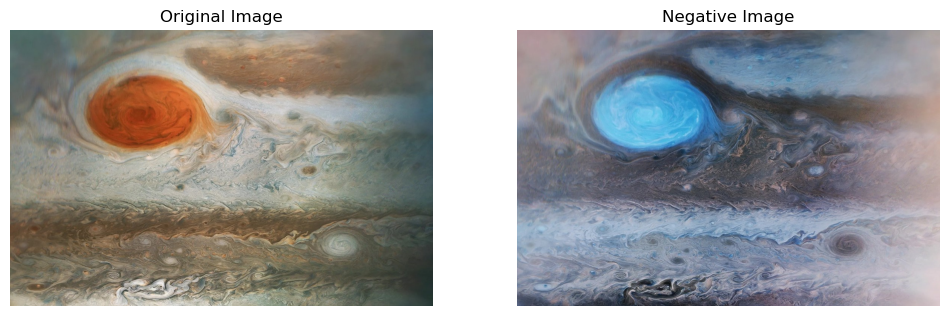

In [3]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\jupiter_red_spot.jpg"
image_negative(image_path)

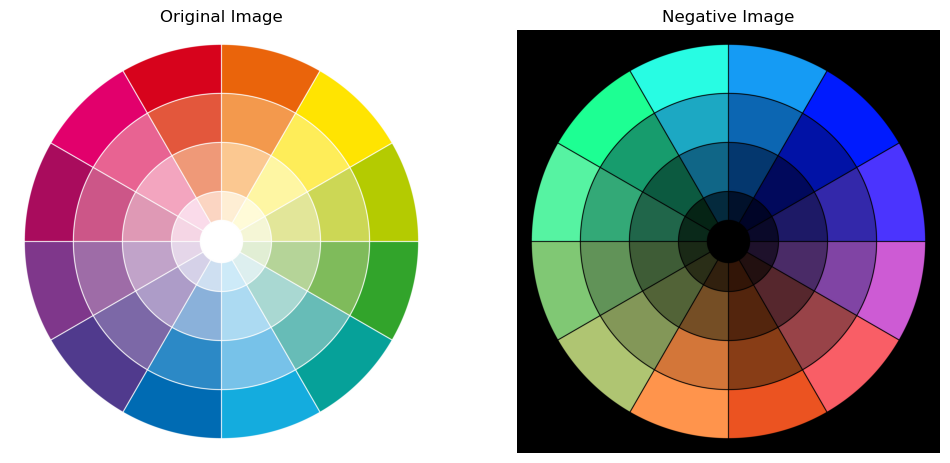

In [4]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\colour-wheel-1935401024.jpg"
image_negative(image_path)

# Gamma Correction

In [7]:
def gamma_correction(image_path, c, gamma):
    image = cv2.imread(image_path)
    
    r = image.astype(float) / 255.0
    corrected_image_float = c * np.power(r, gamma)
    
    # Convert back to the range [0, 255]
    corrected_image = np.clip(corrected_image_float * 255, 0, 255).astype(np.uint8)
    
    # Convert from BGR to RGB for display purposes
    corrected_image_rgb = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB)
    
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].imshow(original_image_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(corrected_image_rgb)
    axes[1].set_title(f'Gamma Corrected Image (c={c})(gamma={gamma})')
    axes[1].axis('off')
    
    plt.show()

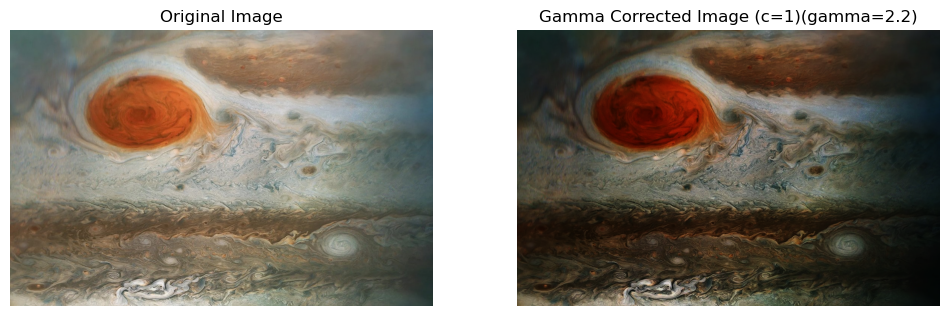

In [8]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\jupiter_red_spot.jpg"
gamma_correction(image_path, 1, 2.2)

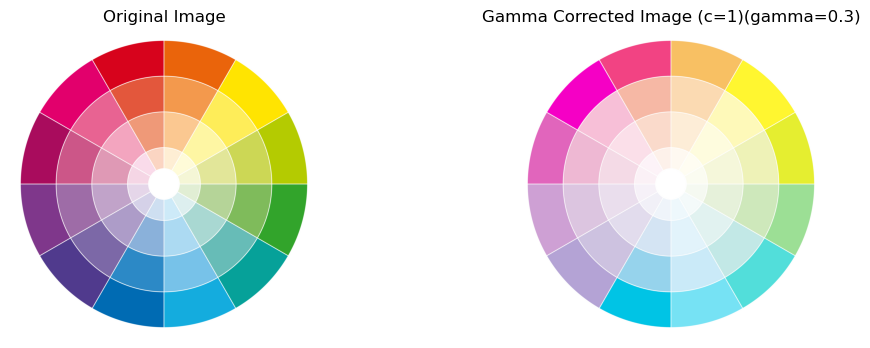

In [11]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\colour-wheel-1935401024.jpg"
gamma_correction(image_path, 1, 0.3)

# Log Transformation

In [12]:
def log_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    image_float = image / 255.0
    
    L = 256
    c = (L - 1) / np.log(1 + L) # note the L-1 not L like in theory

    log_transformed = c * np.log(1 + image_float)

    log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(log_transformed, cmap='gray')
    axes[1].set_title('Log Transformed Image')
    axes[1].axis('off')
    
    plt.show()

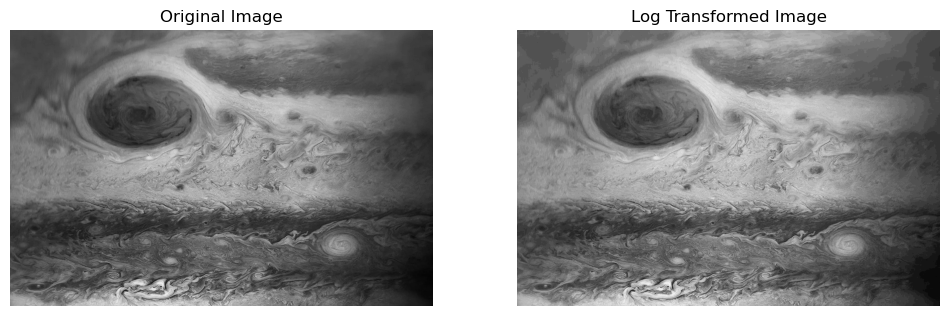

In [15]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\jupiter_red_spot.jpg"
log_transform(image_path)

# Filtering

## Low Pass/High Pass Spatial Filtering

In [51]:
def hl_pass_filter(image_path, high_low):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Box blur (a common low-pass filter)
    blurred_image = cv2.blur(image, (621, 621))
    #increase kernal size for blurring and kernal size must be odd
    
    if high_low == "high":
        high_pass_filtered = cv2.subtract(image, blurred_image) #subtract  blurred image from original image
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if high_low == "low":
        axes[1].imshow(blurred_image, cmap='gray')
        axes[1].set_title('Low-Pass Filtered Image')
    else:
        axes[1].imshow(high_pass_filtered, cmap='gray')
        axes[1].set_title('High-Pass Filtered Image')
    axes[1].axis('off')
    
    plt.show()

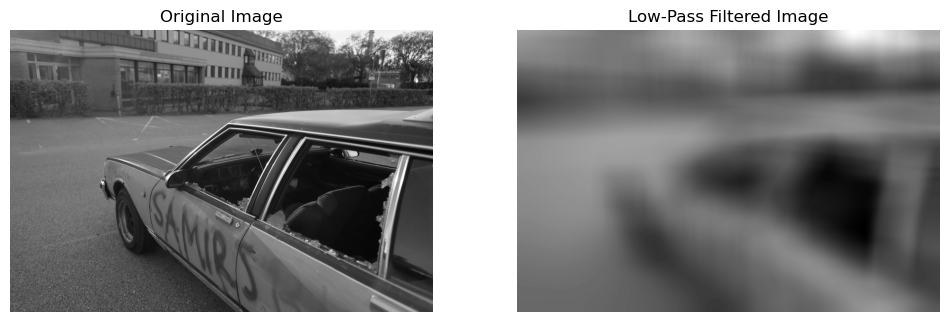

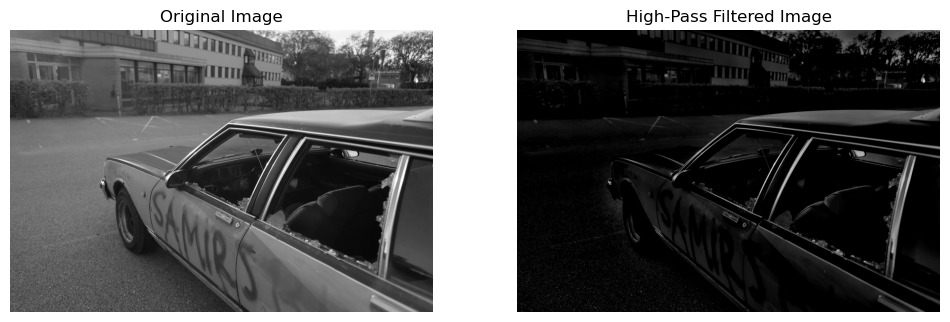

In [50]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\car.jpg"
hl_pass_filter(image_path, "low")
hl_pass_filter(image_path, "high")

## Gaussian Filter

In [47]:
def gaussian_filter(image_path): # a specific type of low-pass filter
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    blurred_image = cv2.GaussianBlur(image, (621, 621), 50) #0 is sigmax which is amount of blurring
    #increase kernal size for blurring and kernal size must be odd

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(blurred_image, cmap='gray')
    axes[1].set_title('Gaussian Filtered Image')
    axes[1].axis('off')
    
    plt.show()

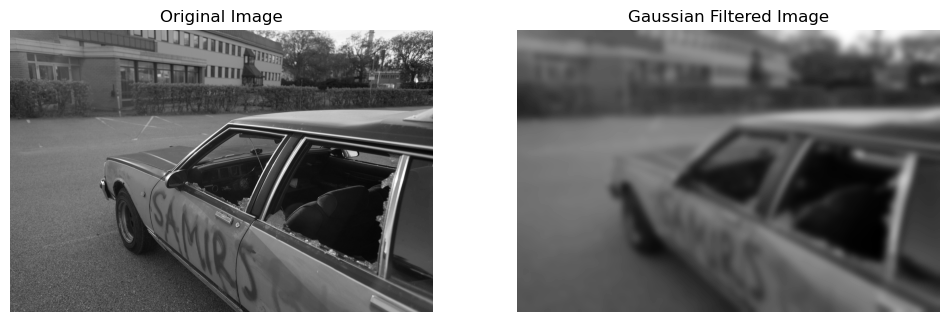

In [48]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\car.jpg"
gaussian_filter(image_path)

## Noise Filtering

In [52]:
def median_filter(image_path, kernel_size): #Median Filter is a type of Noise filter
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    filtered_image = cv2.medianBlur(image, kernel_size)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(filtered_image, cmap='gray')
    axes[1].set_title('Median Filtered Image')
    axes[1].axis('off')

    plt.show()

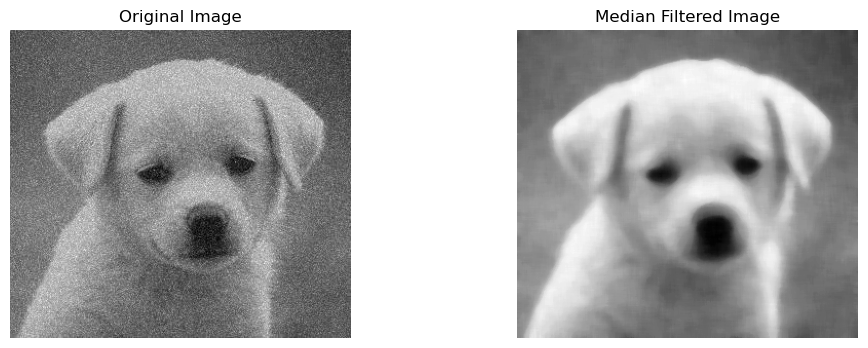

In [57]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\noisy puppy.png"
median_filter(image_path, 11)